In [30]:
import json

with open("data/all_delisted_data.json") as f:
    delisted_data = json.load(f)

with open("data/all_formatted_pre_data.json") as f:
    all_data = json.load(f)

In [31]:
import pandas as pd

delisted_dataframe = pd.DataFrame({
    "id": [],
    "time": [],
    "price": [],
    "volume": [],
})

all_data_dataframe = pd.DataFrame({
    "id": [],
    "time": [],
    "price": [],
    "volume": [],
})



In [3]:
for i, (key, value) in enumerate(delisted_data.items()):
    format_data = []
    for j in range(len(value["price"])):
        time = j + 1
        add_list = [key, time, value["price"][j], value["volume"][j]]
        format_data.append(add_list)
    format_dataframe = pd.DataFrame(format_data, columns=["id", "time", "price", "volume"])
    delisted_dataframe = pd.concat([delisted_dataframe, format_dataframe])

for i, (key, value) in enumerate(all_data.items()):
    format_data = []
    for j in range(len(value["price"])):
        time = j + 1
        add_list = [key, time, value["price"][j], value["volume"][j]]
        format_data.append(add_list)
    format_all_dataframe = pd.DataFrame(format_data, columns=["id", "time", "price", "volume"])
    all_data_dataframe = pd.concat([all_data_dataframe, format_all_dataframe])


In [10]:
all_data_dataframe

,id,time,price,volume
0,0x,1.0,0.148432,7.727619e+06
1,0x,2.0,0.150935,5.606027e+06
2,0x,3.0,0.156295,7.495835e+06
3,0x,4.0,0.154527,7.041316e+06
4,0x,5.0,0.158480,8.037633e+06
...,...,...,...,...
360,zilliqa,361.0,0.027456,3.920566e+07
361,zilliqa,362.0,0.027098,3.107068e+07
362,zilliqa,363.0,0.025773,3.000536e+07
363,zilliqa,364.0,0.025203,2.670580e+07


In [11]:
delisted_dataframe

,id,time,price,volume
0,aragon,1.0,2.232653,5.667235e+06
1,aragon,2.0,2.198965,5.840085e+06
2,aragon,3.0,2.075802,1.204382e+07
3,aragon,4.0,2.081526,7.632657e+06
4,aragon,5.0,2.182547,9.018220e+06
...,...,...,...,...
360,wrapped-nxm,361.0,48.190712,1.174633e+06
361,wrapped-nxm,362.0,49.989480,2.195504e+06
362,wrapped-nxm,363.0,49.600676,2.458928e+06
363,wrapped-nxm,364.0,48.759788,1.595362e+06


In [72]:
delist_feature_list = pd.DataFrame({})
all_feature_list = pd.DataFrame({})

In [64]:
feature_key_list = [
    "price_ave",
    "price_med",
    "price_dev",
    "price_min",
    "price_max",
    "price_max_change",
    "price_min_change",
    "price_sum_abs_change_rate",
    "price_short_dev",
    "price_range",
    "price_max_down",
    "price_max_mean",
    "volume_ave",
    "volume_med",
    "volume_dev",
    "volume_min",
    "volume_max",
    "volume_max_change",
    "volume_min_change",
    "volume_sum_abs_change_rate",
    "volume_short_dev",
    "volume_range",
    "volume_max_down",
    "volume_max_mean"] 

In [228]:
len(feature_key_list)

24

In [75]:
import statistics

def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]
 

def cul_feature(data):
    ave = statistics.mean(data)
    med = statistics.median(data)
    dev = statistics.pstdev(data)
    min_data = min(data)
    max_data = max(data)
    max_change = -(10 ** 10)
    min_change = 10 ** 10
    sum_change = 0
    div_data = list(split_list(data, 4))
    short_dev = 0
    data_range = max(data)-min(data)
    data_down_rate = (max(data) - min(data)) / (min(data) + 0.0000000000000000001)
    max_mean = max_data - ave
    for i in range(len(div_data)):
        short_dev += statistics.pstdev(div_data[i])
    short_dev = short_dev / len(div_data)
    for i in range(1,len(data)):
        temp_change = (data[i] - data[i-1]) / (data[i-1] + + 0.0000000000000000001)
        if max_change < temp_change:
            max_change = temp_change
        if min_change > temp_change:
            min_change = temp_change
        sum_change = abs(temp_change)
    
    feature_data = [ave, med, dev, min_data, max_data, max_change, min_change, sum_change, short_dev, data_range, data_down_rate, max_mean]
    return feature_data
        

In [76]:
for i, (key, value) in enumerate(delisted_data.items()):
    if value["price"] != []:
        price_feature = cul_feature(value["price"])
        volume_feature = cul_feature(value["volume"])
        add_data = price_feature + volume_feature
        add_dataframe = pd.Series(add_data, index=feature_key_list)
        delist_feature_list[key] = add_dataframe

for i, (key, value) in enumerate(all_data.items()):
    if value["price"] != []:
        price_feature = cul_feature(value["price"])
        volume_feature = cul_feature(value["volume"])
        add_data = price_feature + volume_feature
        add_dataframe = pd.Series(add_data, index=feature_key_list)
        all_feature_list[key] = add_dataframe

/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/3152356920.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_feature_list[key] = add_dataframe
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/3152356920.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_feature_list[key] = add_dataframe
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/3152356920.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

In [82]:
delist_feature_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, price_ave to volume_max_mean
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   aragon                     24 non-null     float64
 1   barnbridge                 24 non-null     float64
 2   concentrated-voting-power  24 non-null     float64
 3   drep-new                   24 non-null     float64
 4   ethos                      24 non-null     float64
 5   force-protocol             24 non-null     float64
 6   keep3rv1                   24 non-null     float64
 7   loom-network-new           24 non-null     float64
 8   mobster                    24 non-null     float64
 9   monero                     24 non-null     float64
 10  nem                        24 non-null     float64
 11  omisego                    24 non-null     float64
 12  ooki                       24 non-null     float64
 13  waves                      24 non-nu

In [81]:
all_feature_list

,0x,1inch,bakerytoken,aave,aavegotchi,acala,adventure-gold,aergo,airswap,akropolis,...,wax,wazirx,winklink-bsc,woo-network,wrapped-nxm,yearn-finance,yfii-finance,yield-guild-games,zcash,zilliqa
price_ave,2.461269e-01,3.874739e-01,1.656107e-01,7.420773e+01,9.793392e-01,7.682682e-02,5.895864e-01,1.223685e-01,1.049713e-01,5.886049e-03,...,5.872312e-02,1.362350e-01,0.000077,2.188112e-01,2.871162e+01,7.105126e+03,9.034805e+02,2.558856e-01,3.304052e+01,2.294805e-02
price_med,2.238694e-01,3.704546e-01,1.475705e-01,7.180972e+01,9.514725e-01,6.455467e-02,5.411924e-01,1.160129e-01,1.048297e-01,5.249224e-03,...,5.883660e-02,1.244530e-01,0.000073,2.122087e-01,2.917997e+01,6.928684e+03,8.983657e+02,2.408651e-01,3.114938e+01,2.218492e-02
price_dev,7.332268e-02,1.091213e-01,8.922935e-02,1.435901e+01,1.771782e-01,3.204528e-02,2.279539e-01,2.439576e-02,1.602495e-02,2.701220e-03,...,1.275289e-02,3.637855e-02,0.000013,5.882908e-02,8.648181e+00,1.484403e+03,3.084760e+02,8.152948e-02,6.729470e+00,4.989946e-03
price_min,1.484319e-01,2.236387e-01,8.358531e-02,5.008984e+01,7.234931e-01,3.220503e-02,2.657620e-01,8.495364e-02,7.940945e-02,2.995330e-03,...,3.655007e-02,7.981677e-02,0.000059,1.200896e-01,7.953037e+00,4.906178e+03,4.092002e+02,1.322783e-01,2.408154e+01,1.501337e-02
price_max,5.221147e-01,6.870046e-01,8.364551e-01,1.188823e+02,1.632904e+00,1.625310e-01,1.563631e+00,2.202343e-01,1.930419e-01,1.824525e-02,...,8.928555e-02,2.629020e-01,0.000112,4.718121e-01,4.998948e+01,1.440520e+04,1.643467e+03,5.435349e-01,5.003218e+01,3.552789e-02
price_max_change,5.927641e-01,1.737742e-01,7.503657e-01,2.080205e-01,1.986700e-01,3.151871e-01,5.391287e-01,4.852878e-01,6.118524e-01,4.855357e-01,...,2.078015e-01,5.799843e-01,0.207656,2.350296e-01,1.765924e-01,2.120338e-01,4.064404e-01,7.654237e-01,1.394883e-01,2.359528e-01
price_min_change,-1.260307e-01,-1.526478e-01,-2.201042e-01,-1.209353e-01,-1.421771e-01,-1.522780e-01,-3.956789e-01,-1.296834e-01,-1.663076e-01,-1.578477e-01,...,-1.295604e-01,-2.634028e-01,-0.120874,-1.497865e-01,-9.514747e-02,-3.300524e-01,-3.341560e-01,-3.015922e-01,-1.672299e-01,-1.517367e-01
price_sum_abs_change_rate,2.417548e-03,2.639251e-02,1.292421e-02,8.007753e-03,1.286628e-02,6.143361e-02,2.656976e-02,3.272939e-03,1.358196e-02,1.281603e-02,...,1.916979e-02,1.043191e-01,0.004492,1.518606e-02,3.820781e-04,2.104892e-03,2.516863e-02,6.015115e-03,3.043075e-03,5.577770e-03
price_short_dev,7.631692e-03,9.342061e-03,8.948291e-03,1.800394e+00,1.929852e-02,2.492663e-03,2.921825e-02,3.046499e-03,3.052952e-03,2.420654e-04,...,1.455361e-03,3.784457e-03,0.000002,7.385272e-03,4.980318e-01,1.879080e+02,2.555411e+01,1.149611e-02,6.901288e-01,5.456033e-04
price_range,3.736827e-01,4.633659e-01,7.528698e-01,6.879246e+01,9.094105e-01,1.303259e-01,1.297868e+00,1.352807e-01,1.136325e-01,1.524992e-02,...,5.273548e-02,1.830852e-01,0.000053,3.517225e-01,4.203644e+01,9.499022e+03,1.234267e+03,4.112566e-01,2.595064e+01,2.051452e-02


In [131]:
from scipy.stats import ks_2samp

import numpy as np

# 異常値を検出する関数
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]

def remove_outliers_index(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 30 * iqr
    upper_bound = q3 + 30 * iqr
    index_list = set()
    for i, value in enumerate(data):
        if value > upper_bound:
            index_list.add(i)    
    return index_list


def check_KS_value(group1, group2):
    # Kolmogorov-Smirnov検定
    k, p_value = ks_2samp(group1, group2)

    # p値の判定
    if p_value < 0.05:
        return p_value, 1
    else:
        return p_value, 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


13

In [117]:
import numpy as np

format_all_feature = all_feature_list.T
format_delist_feature = delist_feature_list.T
join_feature = pd.concat([format_delist_feature, format_all_feature])

stn_join_feature = join_feature.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)

stn_join_feature
    

,price_ave,price_med,price_dev,price_min,price_max,price_max_change,price_min_change,price_sum_abs_change_rate,price_short_dev,price_range,...,volume_dev,volume_min,volume_max,volume_max_change,volume_min_change,volume_sum_abs_change_rate,volume_short_dev,volume_range,volume_max_down,volume_max_mean
aragon,-0.079067,-0.077994,-0.076121,-0.080462,-0.075293,-0.145926,0.855123,-0.531403,-0.070573,-0.071045,...,-0.420616,-0.014309,-0.501032,-0.055641,1.990623,-0.507166,-0.324091,-0.508703,-0.055641,-0.525910
barnbridge,-0.079659,-0.078686,-0.077931,-0.081913,-0.074401,0.013287,0.012781,0.430671,-0.066400,-0.068890,...,-0.061866,-0.262011,-0.175440,-0.055641,-0.174907,0.325797,-0.093755,-0.172814,-0.055641,-0.166856
concentrated-voting-power,-0.087566,-0.087167,-0.087436,-0.086578,-0.081988,-0.118741,0.670499,0.452817,-0.077678,-0.077929,...,-0.388032,-0.282238,-0.337714,-0.055641,0.022134,-0.238838,-0.375317,-0.337250,-0.055641,-0.329143
drep-new,-0.087665,-0.087267,-0.087235,-0.086728,-0.081947,0.011081,-0.176511,-0.015532,-0.077548,-0.077784,...,-0.150003,-0.269046,0.014892,-0.055641,-0.917123,-0.198544,-0.221447,0.020690,-0.055641,0.056082
ethos,-0.087935,-0.087660,-0.086774,-0.087164,-0.081934,-0.061664,-0.679708,-0.293959,-0.077627,-0.077526,...,-0.045911,-0.250196,-0.151289,-0.055641,-0.457686,-0.728318,0.054612,-0.148523,-0.055641,-0.156046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yearn-finance,17.141968,17.111192,17.453001,16.756510,17.603326,-0.134443,-1.151308,-0.598049,17.720960,17.732521,...,0.355980,0.484920,0.337859,-0.055641,1.138062,-0.035825,0.104090,0.333208,-0.055641,0.340379
yfii-finance,2.102539,2.142009,3.556989,1.317386,1.935062,-0.096340,-1.185729,-0.027295,2.342131,2.235766,...,-0.385494,-0.194686,-0.459342,-0.055641,0.889499,-0.482881,-0.304761,-0.462622,-0.055641,-0.476800
yield-guild-games,-0.087845,-0.087425,-0.087328,-0.087035,-0.082044,-0.025983,-0.912586,-0.501284,-0.077371,-0.077764,...,0.389421,-0.056424,0.693367,-0.055641,1.500463,0.122793,0.076174,0.705559,-0.055641,0.757810
zcash,-0.008340,-0.010700,-0.008769,-0.004812,-0.021284,-0.148661,0.214433,-0.574832,-0.013088,-0.029877,...,-0.198357,0.412494,-0.373908,-0.055641,0.951793,-0.554139,-0.101956,-0.388381,-0.055641,-0.428923


In [121]:
join_price_feature = join_feature.loc[:, ["price_ave", "price_med", "price_dev", "price_min", "price_max", "price_max_change", "price_min_change", "price_sum_abs_change_rate", "price_short_dev", "price_range", "price_max_down", "price_max_mean"]]
join_volume_feature = join_feature.loc[:, ["volume_ave", "volume_med", "volume_dev", "volume_min", "volume_max", "volume_max_change", "volume_min_change", "volume_sum_abs_change_rate", "volume_short_dev", "volume_range", "volume_max_down", "volume_max_mean"]]

In [156]:
price_out_index = set()
volume_out_index = set()

for i, (key, value) in enumerate(join_price_feature.items()):
    bad = remove_outliers_index(value)
    price_out_index = price_out_index | bad

for i, (key, value) in enumerate(join_volume_feature.items()):
    bad = remove_outliers_index(value)
    volume_out_index = volume_out_index | bad

print(len(price_out_index))
print(len(volume_out_index))
print(volume_out_index)
price_out_index

20
20
{68, 8, 76, 13, 141, 283, 28, 284, 286, 220, 93, 247, 232, 169, 43, 176, 118, 55, 120, 314}


{6,
 8,
 9,
 23,
 35,
 55,
 58,
 71,
 76,
 154,
 166,
 191,
 197,
 202,
 224,
 243,
 282,
 311,
 318,
 319}

In [149]:
format_join_price_feature = pd.DataFrame()
format_join_volume_feature = pd.DataFrame()


for i, (key, value) in enumerate(join_price_feature.items()):
    temp_series = pd.Series()
    for j, (keys, value) in enumerate(value.items()):
        if j not in price_out_index:
            temp_series[keys] = value
    format_join_price_feature[key] = temp_series

for i, (key, value) in enumerate(join_volume_feature.items()):
    temp_series = pd.Series()
    for j, (keys, value) in enumerate(value.items()):
        if j not in volume_out_index:
            temp_series[keys] = value
    format_join_volume_feature[key] = temp_series



/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/2390176517.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_series = pd.Series()
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/2390176517.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_series = pd.Series()
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/2390176517.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_series = pd.Series()
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/2390176517.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. 

,price_ave,price_med,price_dev,price_min,price_max,price_max_change,price_min_change,price_sum_abs_change_rate,price_short_dev,price_range,price_max_down,price_max_mean
aragon,3.875321,4.040271,1.029915,2.046788,6.041643,0.153443,-0.090847,0.004798,0.083260,3.994854,1.951767,2.166322
barnbridge,3.631258,3.761422,0.876716,1.624099,6.768199,0.965785,-0.191271,0.043675,0.127315,5.144100,3.167355,3.136941
concentrated-voting-power,0.370646,0.344739,0.072396,0.265300,0.588607,0.292148,-0.112858,0.044570,0.008261,0.323307,1.218646,0.217961
drep-new,0.330212,0.304458,0.089369,0.221470,0.622414,0.954532,-0.213838,0.025644,0.009627,0.400944,1.810373,0.292202
ethos,0.218883,0.146131,0.128367,0.094516,0.632887,0.583368,-0.273829,0.014393,0.008797,0.538371,5.696075,0.414004
...,...,...,...,...,...,...,...,...,...,...,...,...
winklink-bsc,0.000077,0.000073,0.000013,0.000059,0.000112,0.207656,-0.120874,0.004492,0.000002,0.000053,0.886639,0.000035
woo-network,0.218811,0.212209,0.058829,0.120090,0.471812,0.235030,-0.149786,0.015186,0.007385,0.351722,2.928834,0.253001
yield-guild-games,0.255886,0.240865,0.081529,0.132278,0.543535,0.765424,-0.301592,0.006015,0.011496,0.411257,3.109026,0.287649
zcash,33.040524,31.149378,6.729470,24.081543,50.032184,0.139488,-0.167230,0.003043,0.690129,25.950641,1.077615,16.991660


In [151]:


stn_price_join_feature = format_join_price_feature.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)
stn_volume_join_feature = format_join_volume_feature.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)


stn_volume_join_feature

,volume_ave,volume_med,volume_dev,volume_min,volume_max,volume_max_change,volume_min_change,volume_sum_abs_change_rate,volume_short_dev,volume_range,volume_max_down,volume_max_mean
aragon,-0.255748,-0.160475,-0.440196,0.011496,-0.610235,-0.518150,2.024163,-0.483464,-0.348006,-0.616928,-0.423448,-0.642817
barnbridge,-0.240925,-0.345207,-0.070118,-0.350221,-0.206132,0.337609,-0.285614,0.311162,-0.096931,-0.202204,-0.171445,-0.195544
concentrated-voting-power,-0.396877,-0.379534,-0.406583,-0.379759,-0.407536,-0.326009,-0.075449,-0.227486,-0.403844,-0.405234,-0.208230,-0.397705
drep-new,-0.348553,-0.377952,-0.161038,-0.360496,0.030096,2.893865,-1.077270,-0.189046,-0.236120,0.036717,-0.005869,0.082169
ethos,-0.098753,-0.195966,-0.053660,-0.332969,-0.176157,0.076603,-0.587229,-0.694437,0.064796,-0.172211,-0.197013,-0.182079
...,...,...,...,...,...,...,...,...,...,...,...,...
yearn-finance,0.306800,0.251634,0.360921,0.740518,0.430942,-0.508023,1.114812,-0.033817,0.118728,0.422584,-0.385735,0.436317
yfii-finance,-0.281797,-0.225338,-0.403965,-0.251908,-0.558492,-0.427794,0.849692,-0.460297,-0.326936,-0.560032,-0.393805,-0.581642
yield-guild-games,0.096673,0.065477,0.395418,-0.050005,0.872175,-0.461764,1.501353,0.117501,0.088300,0.882328,-0.230294,0.956310
zcash,0.135179,0.289623,-0.210919,0.634755,-0.452458,-0.507253,0.916135,-0.528275,-0.105870,-0.468365,-0.422945,-0.522000


In [152]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

pca = PCA()
pca.fit(stn_price_join_feature)
# データを主成分空間に写像
feature = pca.transform(stn_price_join_feature)

In [155]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(stn_price_join_feature.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.449954,-1.268748,-0.290591,0.380601,0.267817,-0.160214,0.124984,0.059669,-0.025558,-0.031883,-1.679057e-16,-1.984640e-16
1,0.563472,0.727410,0.285420,-0.398298,0.712840,0.139530,0.116421,-0.109987,0.134868,-0.023067,-2.390499e-16,-1.143712e-16
2,-0.837609,-0.713966,0.830407,0.212971,0.396596,0.068935,0.019044,0.000363,-0.003449,0.001507,1.726827e-16,-1.177238e-16
3,-0.913057,0.505306,-0.090727,-0.723161,0.516825,0.236765,0.030061,0.030130,-0.015195,-0.000011,5.683829e-17,6.982108e-18
4,-0.919573,0.891928,-0.511089,-0.146932,-0.551888,-0.144350,0.001973,0.007965,0.001332,0.000995,7.286179e-17,7.484688e-17


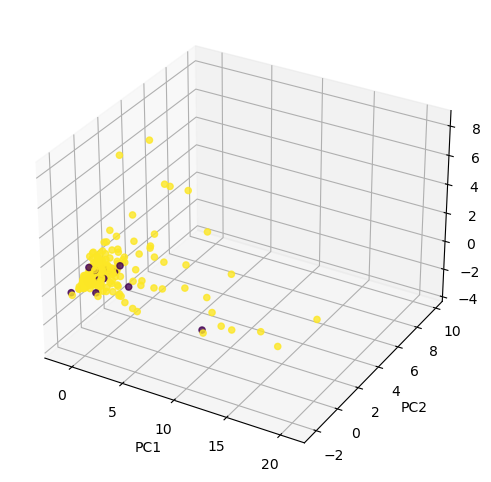

In [162]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt

color = []

for i in range(17):
    color.append(0)
for i in range(270):
    color.append(1)

# 第一主成分と第二主成分でプロットする
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})
ax.scatter(feature[:, 0], feature[:, 1], feature[:, 2], alpha=0.8, c=color)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()



In [163]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(stn_price_join_feature.columns))])


,0
PC1,6.311492e-01
PC2,1.609177e-01
PC3,7.433431e-02
PC4,5.609783e-02
PC5,4.823743e-02
PC6,2.341316e-02
PC7,3.362690e-03
PC8,1.776849e-03
PC9,6.938162e-04
PC10,1.703534e-05


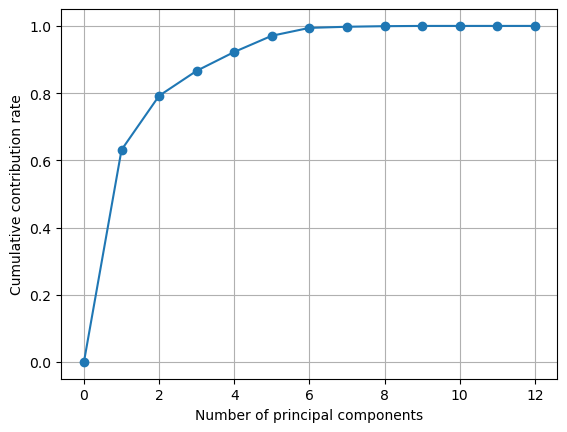

In [164]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()


In [166]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(stn_price_join_feature.columns))])


,0
PC1,7.573790e+00
PC2,1.931012e+00
PC3,8.920117e-01
PC4,6.731739e-01
PC5,5.788491e-01
PC6,2.809579e-01
PC7,4.035228e-02
PC8,2.132218e-02
PC9,8.325795e-03
PC10,2.044241e-04


In [169]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=stn_price_join_feature.columns[:], index=["PC{}".format(x + 1) for x in range(len(stn_price_join_feature.columns))])


,price_ave,price_med,price_dev,price_min,price_max,price_max_change,price_min_change,price_sum_abs_change_rate,price_short_dev,price_range,price_max_down,price_max_mean
PC1,0.355958,3.536223e-01,3.574535e-01,0.342927,0.362226,-2.213469e-02,2.568048e-02,4.861226e-02,3.586213e-01,0.353129,1.920755e-02,0.338342
PC2,-0.047725,-5.497391e-02,3.252878e-02,-0.074512,0.014832,5.416025e-01,-5.393701e-01,3.027095e-01,-3.496336e-03,0.053759,5.498398e-01,0.082205
PC3,-0.000670,-1.224624e-04,-3.228367e-02,0.017670,-0.027393,-2.086669e-01,8.395884e-02,9.464430e-01,4.753024e-03,-0.046055,-2.155180e-01,-0.054385
PC4,-0.125722,-1.366279e-01,7.957365e-02,-0.202843,0.033331,-3.550698e-01,4.885811e-01,6.229777e-02,-8.977308e-02,0.136516,6.924953e-01,0.205001
PC5,0.023786,3.454956e-02,-4.430237e-02,0.049650,-0.005070,7.227548e-01,6.772310e-01,7.791560e-02,-3.814963e-03,-0.029107,-6.723352e-02,-0.036299
PC6,-0.283072,-3.180767e-01,1.720036e-01,-0.432596,0.109765,1.155349e-01,-5.111551e-02,1.978718e-03,-8.292396e-02,0.345106,-4.068905e-01,0.531437
PC7,0.186103,1.996376e-01,5.183335e-01,-0.615327,-0.131641,2.108511e-02,1.667906e-02,1.315994e-03,1.784609e-01,0.089431,-1.699935e-02,-0.469068
PC8,0.195818,3.348333e-01,1.219579e-01,0.012722,0.104524,1.139862e-02,-3.238197e-02,1.699060e-02,-8.953271e-01,0.140168,-2.890709e-02,-0.004513
PC9,0.149060,3.950722e-01,-7.293031e-01,-0.402368,0.097157,-1.617315e-02,-8.803354e-03,1.589024e-03,1.354579e-01,0.314102,1.022873e-02,0.031962
PC10,0.598296,-6.654659e-01,-1.296935e-01,0.022303,0.202472,1.194718e-03,9.531566e-04,8.472550e-04,-6.780831e-02,0.272556,6.821073e-05,-0.248992


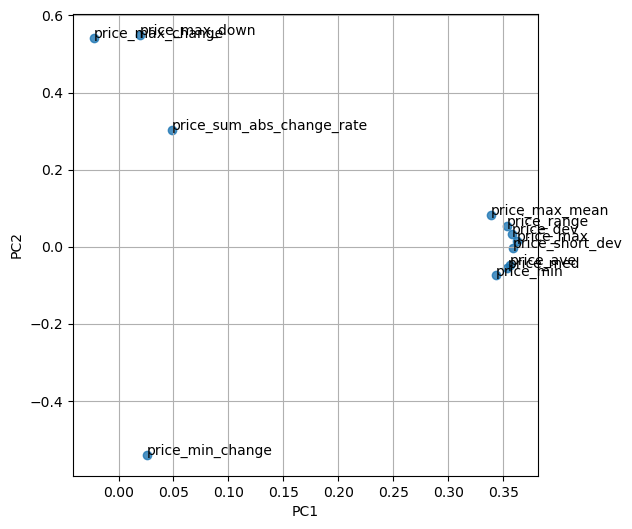

In [170]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], stn_price_join_feature.columns[:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


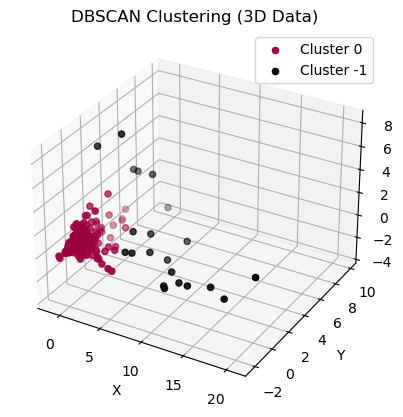

In [181]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

target = feature[:, [0,1,2]]

dbscan = DBSCAN(eps=2.0, min_samples=10)
labels = dbscan.fit_predict(target)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# クラスタごとにプロット
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:  # 外れ値
        color = 'k'  # 黒色
    mask = (labels == label)
    ax.scatter(target[mask, 0], target[mask, 1], target[mask, 2], c=[color], label=f'Cluster {label}')

# グラフの設定
ax.set_title("DBSCAN Clustering (3D Data)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

In [182]:
join_feature

,price_ave,price_med,price_dev,price_min,price_max,price_max_change,price_min_change,price_sum_abs_change_rate,price_short_dev,price_range,...,volume_dev,volume_min,volume_max,volume_max_change,volume_min_change,volume_sum_abs_change_rate,volume_short_dev,volume_range,volume_max_down,volume_max_mean
aragon,3.875321,4.040271,1.029915,2.046788,6.041643,0.153443,-0.090847,0.004798,0.083260,3.994854,...,6.378520e+06,3.495106e+06,4.773811e+07,2.537252,-0.647185,0.180792,2.883012e+06,4.424300e+07,12.658560,3.605522e+07
barnbridge,3.631258,3.761422,0.876716,1.624099,6.768199,0.965785,-0.191271,0.043675,0.127315,5.144100,...,2.872820e+07,7.594933e+05,2.244631e+08,55.199789,-0.854264,0.584579,7.208470e+06,2.237036e+08,294.543222,2.119656e+08
concentrated-voting-power,0.370646,0.344739,0.072396,0.265300,0.588607,0.292148,-0.112858,0.044570,0.008261,0.323307,...,8.408453e+06,5.361071e+05,1.363839e+08,14.361384,-0.835422,0.310866,1.921050e+06,1.358478e+08,253.396760,1.324568e+08
drep-new,0.330212,0.304458,0.089369,0.221470,0.622414,0.954532,-0.213838,0.025644,0.009627,0.400944,...,2.323738e+07,6.817887e+05,3.277720e+08,212.509297,-0.925239,0.330399,4.810563e+06,3.270902e+08,479.753015,3.211892e+08
ethos,0.218883,0.146131,0.128367,0.094516,0.632887,0.583368,-0.273829,0.014393,0.008797,0.538371,...,2.972218e+07,8.899721e+05,2.375721e+08,39.137748,-0.881305,0.073586,9.994644e+06,2.366822e+08,265.943339,2.172615e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yearn-finance,7105.125663,6928.684434,1484.403387,4906.177994,14405.199908,0.212034,-0.330052,0.002105,187.907972,9499.021914,...,5.475946e+07,9.008574e+06,5.030723e+08,3.160449,-0.728712,0.409279,1.092378e+07,4.940637e+08,54.843726,4.604742e+08
yfii-finance,903.480502,898.365746,308.475951,409.200167,1643.466953,0.406440,-0.334156,0.025169,25.554107,1234.266786,...,8.566600e+06,1.503022e+06,7.036652e+07,8.097671,-0.752480,0.192564,3.246009e+06,6.886349e+07,45.816676,6.011514e+07
yield-guild-games,0.255886,0.240865,0.081529,0.132278,0.543535,0.765424,-0.301592,0.006015,0.011496,0.411257,...,5.684281e+07,3.029983e+06,6.960354e+08,6.007193,-0.694057,0.486171,1.039956e+07,6.930054e+08,228.715978,6.649850e+08
zcash,33.040524,31.149378,6.729470,24.081543,50.032184,0.139488,-0.167230,0.003043,0.690129,25.950641,...,2.022497e+07,8.208705e+06,1.167383e+08,3.207823,-0.746524,0.158021,7.054460e+06,1.085296e+08,13.221278,8.357176e+07


In [185]:
out_index = set()

for i, (key, value) in enumerate(join_feature.items()):
    bad = remove_outliers_index(value)
    out_index = out_index | bad

In [192]:
out_index

{6,
 8,
 9,
 13,
 23,
 28,
 35,
 43,
 55,
 58,
 68,
 71,
 76,
 93,
 118,
 120,
 141,
 154,
 166,
 169,
 176,
 191,
 197,
 202,
 220,
 224,
 232,
 243,
 247,
 282,
 283,
 284,
 286,
 311,
 314,
 318,
 319}

In [188]:
format_join_feature = pd.DataFrame()

for i, (key, value) in enumerate(join_feature.items()):
    temp_series = pd.Series()
    for j, (keys, value) in enumerate(value.items()):
        if j not in out_index:
            temp_series[keys] = value
    format_join_feature[key] = temp_series

/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/2697043726.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_series = pd.Series()
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/2697043726.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_series = pd.Series()
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/2697043726.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_series = pd.Series()
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_5970/2697043726.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. 

In [189]:
stn_join_feature = format_join_feature.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [190]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

pca = PCA()
pca.fit(stn_join_feature)
# データを主成分空間に写像
feature = pca.transform(stn_join_feature)

In [213]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(stn_join_feature.columns))])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,0.329916,-0.883093,-2.322916,0.507011,0.230471,0.857003,0.546171,-0.919542,-0.577076,0.561192,...,0.094623,0.058162,-0.004310,-0.009948,0.014133,-0.031617,-1.991306e-16,-1.514682e-16,-1.675278e-18,1.929445e-17
1,0.240688,-0.799339,1.294677,0.295230,0.358891,-0.809864,-0.617271,-0.527080,-0.297048,-0.881717,...,0.204761,-0.128592,0.075657,0.043806,0.022623,-0.019413,6.579528e-18,-1.378255e-17,-2.359511e-16,-4.292753e-17
2,-1.096469,-0.715438,-0.916642,-0.515709,0.539678,-0.255746,0.321295,-0.303189,0.523828,-0.019840,...,-0.013908,0.006551,-0.003281,-0.002843,-0.007336,0.002565,-1.118759e-16,-1.708723e-16,1.116203e-16,1.929055e-16
3,-1.289163,-0.376768,2.433232,-0.709737,-0.627945,-0.209193,-0.539852,-1.381215,-0.200474,-1.663158,...,0.097395,0.032134,-0.034716,-0.010651,0.001618,-0.000264,8.727280e-17,1.151248e-16,-4.964390e-16,4.728186e-16
4,-1.122707,-0.152257,0.642240,0.978514,-0.911744,-0.270482,-0.236198,0.375223,0.447114,-0.493076,...,0.025570,0.005450,0.035090,-0.065448,-0.019269,0.003028,-2.292625e-17,-8.479177e-17,-1.520377e-16,-2.382898e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,-1.639755,-1.403140,0.624428,-2.171431,-0.681217,1.310709,0.351724,0.552771,0.092804,0.754151,...,0.037044,-0.041746,-0.028487,0.026658,-0.007528,-0.003225,-2.939727e-16,6.403925e-17,-5.260390e-17,8.735841e-16
267,-0.979062,-0.125274,-0.783340,-0.418718,0.210439,0.136757,0.167554,0.820761,-0.100771,-0.300748,...,0.002696,-0.035302,0.000040,0.030311,0.002531,-0.002789,-1.634778e-16,8.232007e-17,4.652733e-17,1.056278e-16
268,-0.470591,1.548955,0.586848,1.730615,-0.158156,-0.857813,-1.179341,-0.666631,-1.060939,0.969520,...,-0.024170,0.052765,-0.039454,0.065489,0.013948,-0.004019,7.463760e-16,-4.017532e-17,-1.882276e-16,-4.202091e-16
269,10.173087,-3.340267,-1.621275,-0.325825,-1.216285,1.132247,-1.341533,-0.360769,0.165497,-0.279069,...,-0.764958,0.583474,-0.516368,-0.174531,0.002187,0.061555,-2.294203e-16,2.929726e-16,1.531454e-15,-1.141292e-15


In [310]:
feature

array([[ 3.29915707e-01, -8.83093382e-01, -2.32291573e+00, ...,
        -1.51468235e-16, -1.67527769e-18,  1.92944492e-17],
       [ 2.40688399e-01, -7.99339256e-01,  1.29467672e+00, ...,
        -1.37825458e-17, -2.35951130e-16, -4.29275264e-17],
       [-1.09646858e+00, -7.15438463e-01, -9.16642124e-01, ...,
        -1.70872331e-16,  1.11620314e-16,  1.92905491e-16],
       ...,
       [-4.70591281e-01,  1.54895550e+00,  5.86847545e-01, ...,
        -4.01753212e-17, -1.88227591e-16, -4.20209126e-16],
       [ 1.01730869e+01, -3.34026717e+00, -1.62127456e+00, ...,
         2.92972626e-16,  1.53145357e-15, -1.14129155e-15],
       [-4.29492295e-01,  1.67187734e+00, -1.38925274e+00, ...,
        -2.00789745e-17,  3.36236829e-17,  8.74292737e-18]])

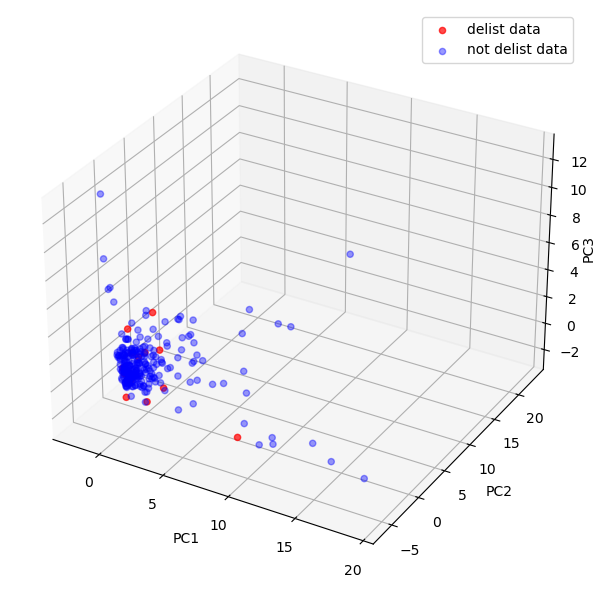

In [300]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

color_group1 = [0 for i in range(16)]
color_group2 = [10 for i in range(255)]


# 第一主成分と第二主成分でプロットする
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})

ax.scatter(feature[:16, 0], feature[:16, 1], feature[:16, 2], alpha=0.7, color="r", label="delist data")
ax.scatter(feature[16:, 0], feature[16:, 1], feature[16:, 2], alpha=0.4, color="b", label="not delist data")

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3", labelpad=-3, rotation=90)

# 凡例の表示
ax.legend()

plt.tight_layout()
plt.show()



In [258]:
feature[:, 0:3].shape

(271, 3)

In [235]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(stn_join_feature.columns))])

for i in pca.explained_variance_ratio_:
    print(i)



0.32196885918644136
0.28185201864318
0.10760301604445575
0.06194485072054496
0.054704021117007166
0.03895892757434741
0.029466115007152942
0.023294014940733056
0.02148824663288321
0.017637348847737884
0.014806991060965464
0.011845745314389821
0.009562193389669564
0.0018471989450271403
0.001519587031342743
0.000839900888538815
0.000329414042249224
0.0002857387837917636
3.766623842714604e-05
8.145591114514402e-06
4.4635761664553795e-33
2.6346644248631172e-33
8.943496982707077e-34
4.425615324836843e-34


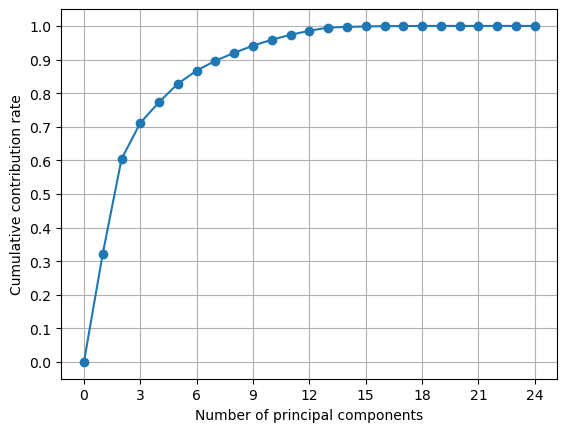

In [236]:
# 累積寄与率を図示する
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))  # 0.1刻みに設定
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()


[[ 3.29915707e-01 -8.83093382e-01 -2.32291573e+00]
 [ 2.40688399e-01 -7.99339256e-01  1.29467672e+00]
 [-1.09646858e+00 -7.15438463e-01 -9.16642124e-01]
 [-1.28916260e+00 -3.76767879e-01  2.43323246e+00]
 [-1.12270678e+00 -1.52257106e-01  6.42239960e-01]
 [-1.43260500e+00 -8.77565529e-01 -7.25161569e-01]
 [-5.61451823e-01  2.35133320e+00  2.89297817e+00]
 [-9.62710569e-01  5.93489859e-01  1.08144502e-01]
 [ 4.40085876e-02  2.08705543e+00  3.74898943e-01]
 [-1.48012981e+00 -9.86696772e-01 -2.86226623e-01]
 [-1.31193756e+00 -8.54077751e-01 -5.83430313e-01]
 [-1.02952747e+00 -9.05387626e-01 -6.02473354e-01]
 [-1.14565696e+00 -4.41544794e-01 -1.30453965e+00]
 [-1.27937416e+00 -1.00062913e+00 -2.41716635e+00]
 [ 1.86659491e+00 -1.26704810e+00 -6.99389014e-01]
 [ 8.95773148e+00 -4.32237783e+00 -1.07085885e+00]
 [-3.89942725e-01  1.90225319e+00 -6.20945201e-02]
 [-3.28535412e-01  1.81232135e+00 -5.37472848e-01]
 [-7.60612842e-01  4.17873448e-01  8.51117258e-01]
 [-9.98429573e-01 -1.07907498e+

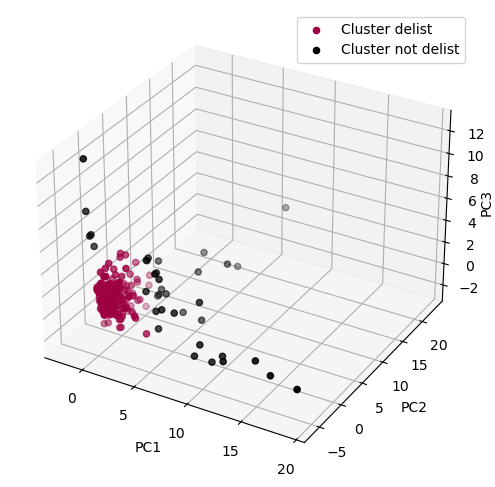

In [307]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

target = feature[:, [0,1,2]]

print(target)
dbscan = DBSCAN(eps=2.0, min_samples=10)
labels = dbscan.fit_predict(target)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})

# クラスタごとにプロット
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:  # 外れ値
        color = 'k'  # 黒色
    mask = (labels == label)
    if label == -1:
        label = "not delist"
    else:
        label = "delist"
    ax.scatter(target[mask, 0], target[mask, 1], target[mask, 2], c=[color], label=f'Cluster {label}')

# グラフの設定
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3", labelpad=-3, rotation=90)
ax.legend()
plt.show()

In [197]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,
        0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1

In [201]:
ans = []
num_wrong = 0
num_good = 0

for i, value in enumerate(labels):
    if (value == -1) and i <= 15:
        ans.append(i)
        num_wrong += 1
    elif value == -1 and i > 15:
        ans.append(i)
        num_good += 1

In [200]:
len(ans)

37

In [233]:
print(num_good)
print(num_wrong)

36
1


In [203]:
precision = num_good / (num_good+num_wrong)
precision

0.972972972972973

In [206]:
# PCA の固有ベクトル
ind_v = pd.DataFrame(pca.components_, columns=stn_join_feature.columns[:], index=["PC{}".format(x + 1) for x in range(len(stn_join_feature.columns))])

main_ind_v = ind_v.iloc[:3, :]

In [211]:
save_value = []

for value in main_ind_v.values:
    save_value.append(list(value))

save_value

[[0.3369708882638471,
  0.33480856071443754,
  0.33912249102870734,
  0.32520899825785005,
  0.3430794085573052,
  -0.03866107151218766,
  0.047635468520500844,
  0.045644241213495244,
  0.33939836697710873,
  0.33435929848762114,
  0.016543012538205046,
  0.32055201401128525,
  0.11498518694003595,
  0.1149811921225748,
  0.10209954407517997,
  0.10848154973624698,
  0.09919488081371561,
  -0.03692073197357963,
  0.09013786718980285,
  0.03855359938601044,
  0.10431493201715689,
  0.09833355304453055,
  -0.034844393009803944,
  0.09385896553824755],
 [-0.10957165607837067,
  -0.10904918161636873,
  -0.10808420387729893,
  -0.10451545899916585,
  -0.10999567826331619,
  -0.01937019471769873,
  0.05606996680137382,
  -0.0332180718177019,
  -0.11064211501051613,
  -0.1070892033886722,
  -0.018604522142257458,
  -0.10108917228803214,
  0.34834468591151263,
  0.3221229849884666,
  0.3504413684843421,
  0.27569370038963453,
  0.34446342730625135,
  -0.04779014041475656,
  0.0607563369260527

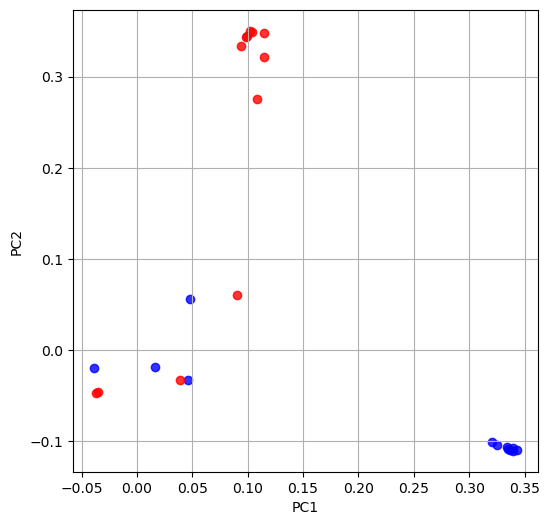

In [224]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
# for x, y, name in zip(pca.components_[0], pca.components_[1], stn_join_feature.columns[:]):
#     if name[0] == "v":
#         plt.text(x, y, "v", color="r")
#     else:
#         plt.text(x, y, "p", color="b")

for x, y, name in zip(pca.components_[0], pca.components_[1], stn_join_feature.columns[:]):
    if name[0] == "v":
        plt.scatter(x, y, alpha=0.8, color="r")
    else:
        plt.scatter(x, y, alpha=0.8, color="b")

plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


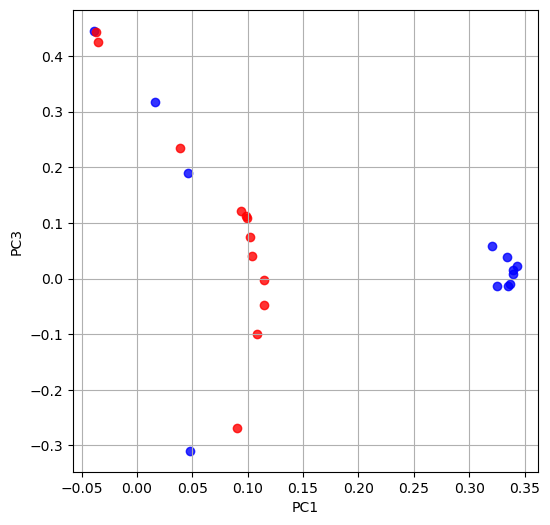

In [225]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
# for x, y, name in zip(pca.components_[0], pca.components_[1], stn_join_feature.columns[:]):
#     if name[0] == "v":
#         plt.text(x, y, "v", color="r")
#     else:
#         plt.text(x, y, "p", color="b")

for x, y, name in zip(pca.components_[0], pca.components_[2], stn_join_feature.columns[:]):
    if name[0] == "v":
        plt.scatter(x, y, alpha=0.8, color="r")
    else:
        plt.scatter(x, y, alpha=0.8, color="b")

plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()


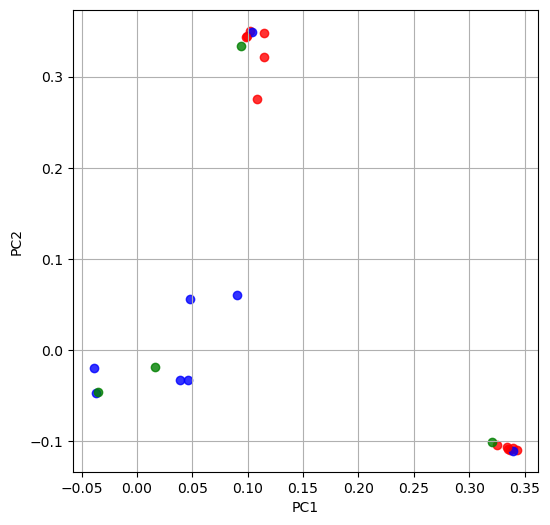

In [232]:
plt.figure(figsize=(6, 6))
# for x, y, name in zip(pca.components_[0], pca.components_[1], stn_join_feature.columns[:]):
#     if name[0] == "v":
#         plt.text(x, y, "v", color="r")
#     else:
#         plt.text(x, y, "p", color="b")

basic = [0, 1, 2, 3, 4, 9, 12, 13, 14, 15, 16, 21]
time = [5, 6, 7, 8, 17, 18, 19, 20]
min_max = [10, 11, 22, 23]


for i, (x, y, name) in enumerate(zip(pca.components_[0], pca.components_[1], stn_join_feature.columns[:])):
    if i in basic:
        plt.scatter(x, y, alpha=0.8, color="r")
    elif i in time:
        plt.scatter(x, y, alpha=0.8, color="b")
    elif i in min_max:
        plt.scatter(x, y, alpha=0.8, color="g")

plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

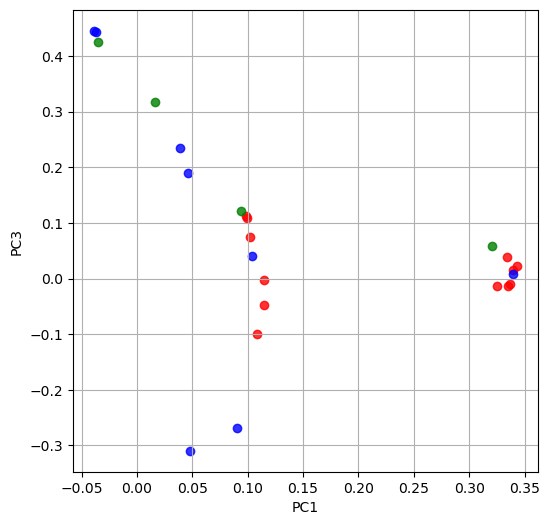

In [230]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
# for x, y, name in zip(pca.components_[0], pca.components_[1], stn_join_feature.columns[:]):
#     if name[0] == "v":
#         plt.text(x, y, "v", color="r")
#     else:
#         plt.text(x, y, "p", color="b")

basic = [0, 1, 2, 3, 4, 9, 12, 13, 14, 15, 16, 21]
time = [5, 6, 7, 8, 17, 18, 19, 20]
min_max = [10, 11, 22, 23]


for i, (x, y, name) in enumerate(zip(pca.components_[0], pca.components_[2], stn_join_feature.columns[:])):
    if i in basic:
        plt.scatter(x, y, alpha=0.8, color="r")
    elif i in time:
        plt.scatter(x, y, alpha=0.8, color="b")
    elif i in min_max:
        plt.scatter(x, y, alpha=0.8, color="g")

plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()


In [226]:


for x, y, name in zip(pca.components_[0], pca.components_[2], stn_join_feature.columns[:]):
    print(name)


price_ave
price_med
price_dev
price_min
price_max
price_max_change
price_min_change
price_sum_abs_change_rate
price_short_dev
price_range
price_max_down
price_max_mean
volume_ave
volume_med
volume_dev
volume_min
volume_max
volume_max_change
volume_min_change
volume_sum_abs_change_rate
volume_short_dev
volume_range
volume_max_down
volume_max_mean
